In [1]:
import sys
sys.executable


'C:\\Users\\Siddharth\\miniconda3\\envs\\bioprocess\\python.exe'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
# Time (hours)
time = np.array([0, 4, 8, 12, 16, 20, 24])

# Biomass concentration X (g/L)
biomass = np.array([0.1, 0.3, 0.8, 1.5, 2.2, 2.8, 3.0])

# Substrate concentration S (g/L)
substrate = np.array([20, 18, 14, 9, 5, 2, 0.5])

# Product concentration P (g/L)
product = np.array([0, 0.2, 0.6, 1.2, 1.9, 2.5, 2.9])


In [4]:
data = pd.DataFrame({
    "Time (h)": time,
    "Biomass X (g/L)": biomass,
    "Substrate S (g/L)": substrate,
    "Product P (g/L)": product
})

data


,Time (h),Biomass X (g/L),Substrate S (g/L),Product P (g/L)
0,0,0.1,20.0,0.0
1,4,0.3,18.0,0.2
2,8,0.8,14.0,0.6
3,12,1.5,9.0,1.2
4,16,2.2,5.0,1.9
5,20,2.8,2.0,2.5
6,24,3.0,0.5,2.9


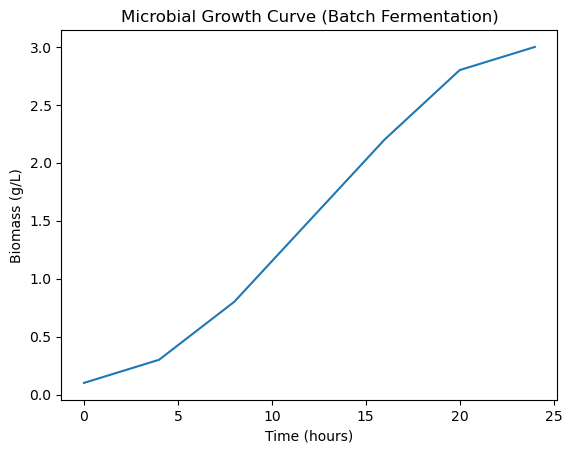

In [5]:
plt.figure()
plt.plot(data["Time (h)"], data["Biomass X (g/L)"])
plt.xlabel("Time (hours)")
plt.ylabel("Biomass (g/L)")
plt.title("Microbial Growth Curve (Batch Fermentation)")
plt.show()


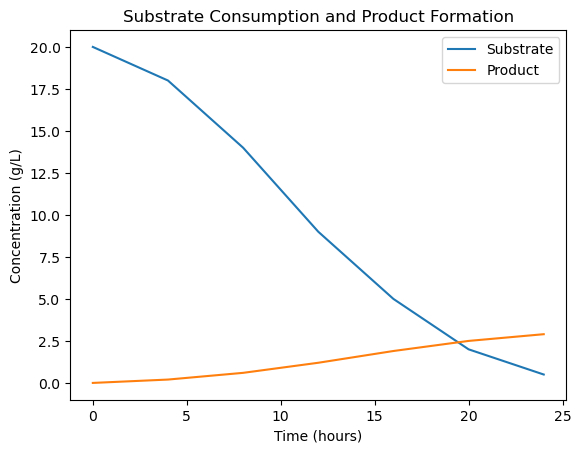

In [6]:
plt.figure()
plt.plot(data["Time (h)"], data["Substrate S (g/L)"], label="Substrate")
plt.plot(data["Time (h)"], data["Product P (g/L)"], label="Product")
plt.xlabel("Time (hours)")
plt.ylabel("Concentration (g/L)")
plt.title("Substrate Consumption and Product Formation")
plt.legend()
plt.show()


In [7]:
mu = []

for i in range(1, len(biomass)):
    mu_value = (np.log(biomass[i]) - np.log(biomass[i-1])) / (time[i] - time[i-1])
    mu.append(mu_value)

mu


[np.float64(0.27465307216702733),
 np.float64(0.2452073132529316),
 np.float64(0.15715216485559352),
 np.float64(0.09574806306402647),
 np.float64(0.06029051420422196),
 np.float64(0.017248217871737914)]

In [8]:
data["Specific growth rate μ (1/h)"] = [np.nan] + mu
data


,Time (h),Biomass X (g/L),Substrate S (g/L),Product P (g/L),Specific growth rate μ (1/h)
0,0,0.1,20.0,0.0,NaN
1,4,0.3,18.0,0.2,0.274653
2,8,0.8,14.0,0.6,0.245207
3,12,1.5,9.0,1.2,0.157152
4,16,2.2,5.0,1.9,0.095748
5,20,2.8,2.0,2.5,0.060291
6,24,3.0,0.5,2.9,0.017248


In [10]:
data[["Time (h)", "Biomass X (g/L)", "Specific growth rate μ (1/h)"]]


,Time (h),Biomass X (g/L),Specific growth rate μ (1/h)
0,0,0.1,NaN
1,4,0.3,0.274653
2,8,0.8,0.245207
3,12,1.5,0.157152
4,16,2.2,0.095748
5,20,2.8,0.060291
6,24,3.0,0.017248


The specific growth rate was highest during the mid-fermentation period, indicating exponential growth. As substrate concentration decreased, growth rate declined and the system entered the stationary phase. Product formation increased throughout the process, suggesting growth-associated product formation.


# Batch Fermentation Kinetics Analysis

## 1. Dataset Description
This section describes the simulated batch fermentation data including biomass, substrate, and product profiles.

## 2. Growth Curve Analysis
The microbial growth curve and substrate consumption trends are analysed.

## 3. Specific Growth Rate Calculation
Specific growth rate (μ) was calculated to identify the exponential growth phase.

## 4. Monod Kinetics
The relationship between specific growth rate and substrate concentration was analysed using the Monod model.


In [11]:
monod_data = data.dropna()

monod_data


,Time (h),Biomass X (g/L),Substrate S (g/L),Product P (g/L),Specific growth rate μ (1/h)
1,4,0.3,18.0,0.2,0.274653
2,8,0.8,14.0,0.6,0.245207
3,12,1.5,9.0,1.2,0.157152
4,16,2.2,5.0,1.9,0.095748
5,20,2.8,2.0,2.5,0.060291
6,24,3.0,0.5,2.9,0.017248


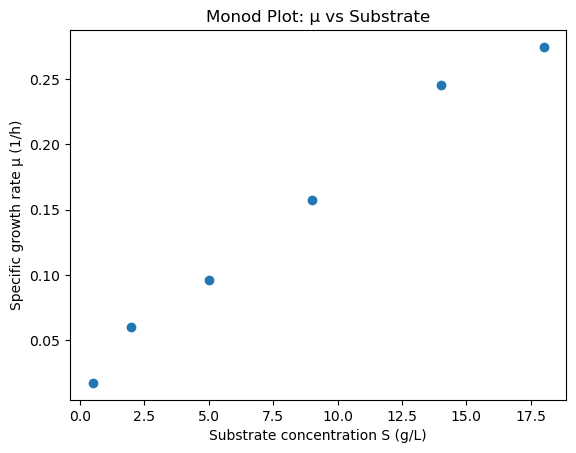

In [12]:
plt.figure()
plt.scatter(monod_data["Substrate S (g/L)"],
            monod_data["Specific growth rate μ (1/h)"])
plt.xlabel("Substrate concentration S (g/L)")
plt.ylabel("Specific growth rate μ (1/h)")
plt.title("Monod Plot: μ vs Substrate")
plt.show()


In [13]:
mu_max = monod_data["Specific growth rate μ (1/h)"].max()
mu_max


0.27465307216702733

In [14]:
half_mu = mu_max / 2
half_mu


0.13732653608351367

In [15]:
Ks = monod_data.iloc[
    (monod_data["Specific growth rate μ (1/h)"] - half_mu).abs().argsort()[:1]
]["Substrate S (g/L)"].values[0]

Ks


np.float64(9.0)

In [16]:
S_range = np.linspace(0, max(monod_data["Substrate S (g/L)"]), 100)
mu_model = mu_max * S_range / (Ks + S_range)


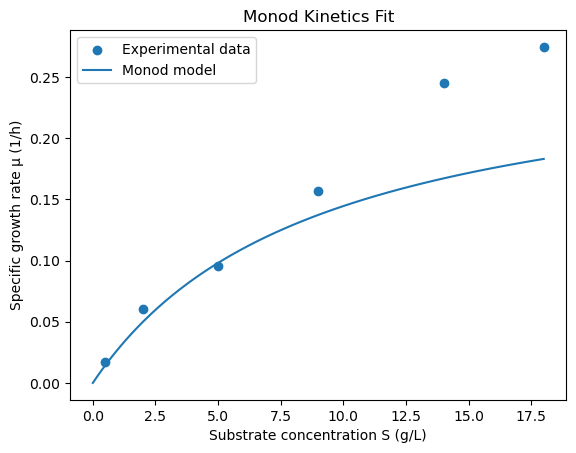

In [17]:
plt.figure()
plt.scatter(monod_data["Substrate S (g/L)"],
            monod_data["Specific growth rate μ (1/h)"],
            label="Experimental data")

plt.plot(S_range, mu_model, label="Monod model")

plt.xlabel("Substrate concentration S (g/L)")
plt.ylabel("Specific growth rate μ (1/h)")
plt.title("Monod Kinetics Fit")
plt.legend()
plt.show()


## Monod Kinetics Interpretation

The relationship between specific growth rate and substrate concentration follows Monod kinetics. The growth rate increases with substrate concentration and approaches a maximum value (μₘₐₓ) at high substrate levels. The estimated half-saturation constant (Kₛ) represents the substrate concentration at which the growth rate is half of μₘₐₓ, indicating the affinity of the microorganism for the substrate.


In [18]:
# Initial values
X_initial = data["Biomass X (g/L)"].iloc[0]
S_initial = data["Substrate S (g/L)"].iloc[0]
P_initial = data["Product P (g/L)"].iloc[0]

# Final values
X_final = data["Biomass X (g/L)"].iloc[-1]
S_final = data["Substrate S (g/L)"].iloc[-1]
P_final = data["Product P (g/L)"].iloc[-1]

X_initial, X_final, S_initial, S_final, P_initial, P_final


(np.float64(0.1),
 np.float64(3.0),
 np.float64(20.0),
 np.float64(0.5),
 np.float64(0.0),
 np.float64(2.9))

In [19]:
delta_X = X_final - X_initial
delta_S = S_initial - S_final   # substrate consumed
delta_P = P_final - P_initial

delta_X, delta_S, delta_P


(np.float64(2.9), np.float64(19.5), np.float64(2.9))

In [20]:
Y_XS = delta_X / delta_S
Y_PS = delta_P / delta_S

Y_XS, Y_PS


(np.float64(0.14871794871794872), np.float64(0.14871794871794872))

In [21]:
print(f"Biomass yield on substrate (Y_X/S): {Y_XS:.3f} g/g")
print(f"Product yield on substrate (Y_P/S): {Y_PS:.3f} g/g")


Biomass yield on substrate (Y_X/S): 0.149 g/g
Product yield on substrate (Y_P/S): 0.149 g/g


I performed growth kinetics, Monod kinetics, and yield coefficient analysis using simulated batch fermentation data